If we perform high-degree Polynomial Regression, we will likely fit the training data much better than with plain Linear Regression.

But in general we won't know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

One way to tell when a model is too simple or too complex: use "cross-validation metric" to get an estimate of a model's generalization performance

## Overfitting

If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then the model is overfitting. 


Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. Solution:

    - Simplify the model: by selecting one with fewer parameter (linear model) by reducing the number of atrributes in the training data or by constraining the model
    - Gather more training data
    - Reduce the noise in the training data (e.g., fix data errors and remove outliers)

## Underfitting

If it performs poorly on both, then it is underfitting.

It occurs when your model is too simple to learn the underlying structure of the data.

Solution:

    - Select a more powerful model, with more parameters
    - Feed better features to the learning algorithm (feature engineering)
    - Reduce the constraints on the model (e.g., reduce the regularization hyperparameter)

## Learning Curve

Another way to tell is to look at the "Learing Curve". These are plots of the model's performance on the training set and the validation set as a function of the training set size (or training iteration). To generate the plots, train the model several times on different sized subsets of the training data. 

The following code defines a function that, given some training data, plot the learning curve of a model:

In [1]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label="val")


Let's look at the learning curve of the plain Linear Regression model

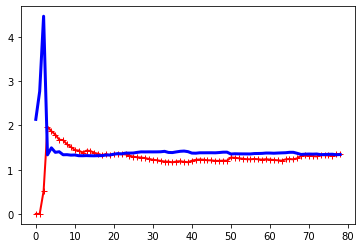

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

First, let's look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse.

Next, let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of a model that's underfitting. Both curves have reached a plateau, they are close and fairly high

In [ ]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_reg = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(poly_reg, X, y)
'''